In [11]:
# !pip install nuscenes-devkit==1.1.9 &> /dev/null  # Install nuScenes.

In [59]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version="v1.0-eval", dataroot="./data/nuscenes_eval" , verbose=True)

Loading NuScenes tables for version v1.0-eval...
0 category,
0 attribute,
0 visibility,
0 instance,
12 sensor,
12 calibrated_sensor,
1 ego_pose,
1 log,
1 scene,
41 sample,
9559 sample_data,
0 sample_annotation,
1 map,
Done loading in 0.022 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


In [60]:
#データセット内に含まれる全シーンの一覧を取得する
nusc.list_scenes()

scene_1, Evaluation scene [70-01-01 00:00:06]   20s, eval, #anns:0


{'token': 'c473d6eb-2ec8-474d-8cc2-99f9b188b5d5', 'name': 'scene_1', 'description': 'Evaluation scene', 'log_token': '35ca8835-b2b2-4533-8ea8-30628e5f5f72', 'nbr_samples': 41, 'first_sample_token': 'e8cecec4-1c6b-43a3-b05a-7c164214f3a6', 'last_sample_token': '8e8754e2-bcf6-48a2-9d33-363d222fb67b'}
e8cecec4-1c6b-43a3-b05a-7c164214f3a6


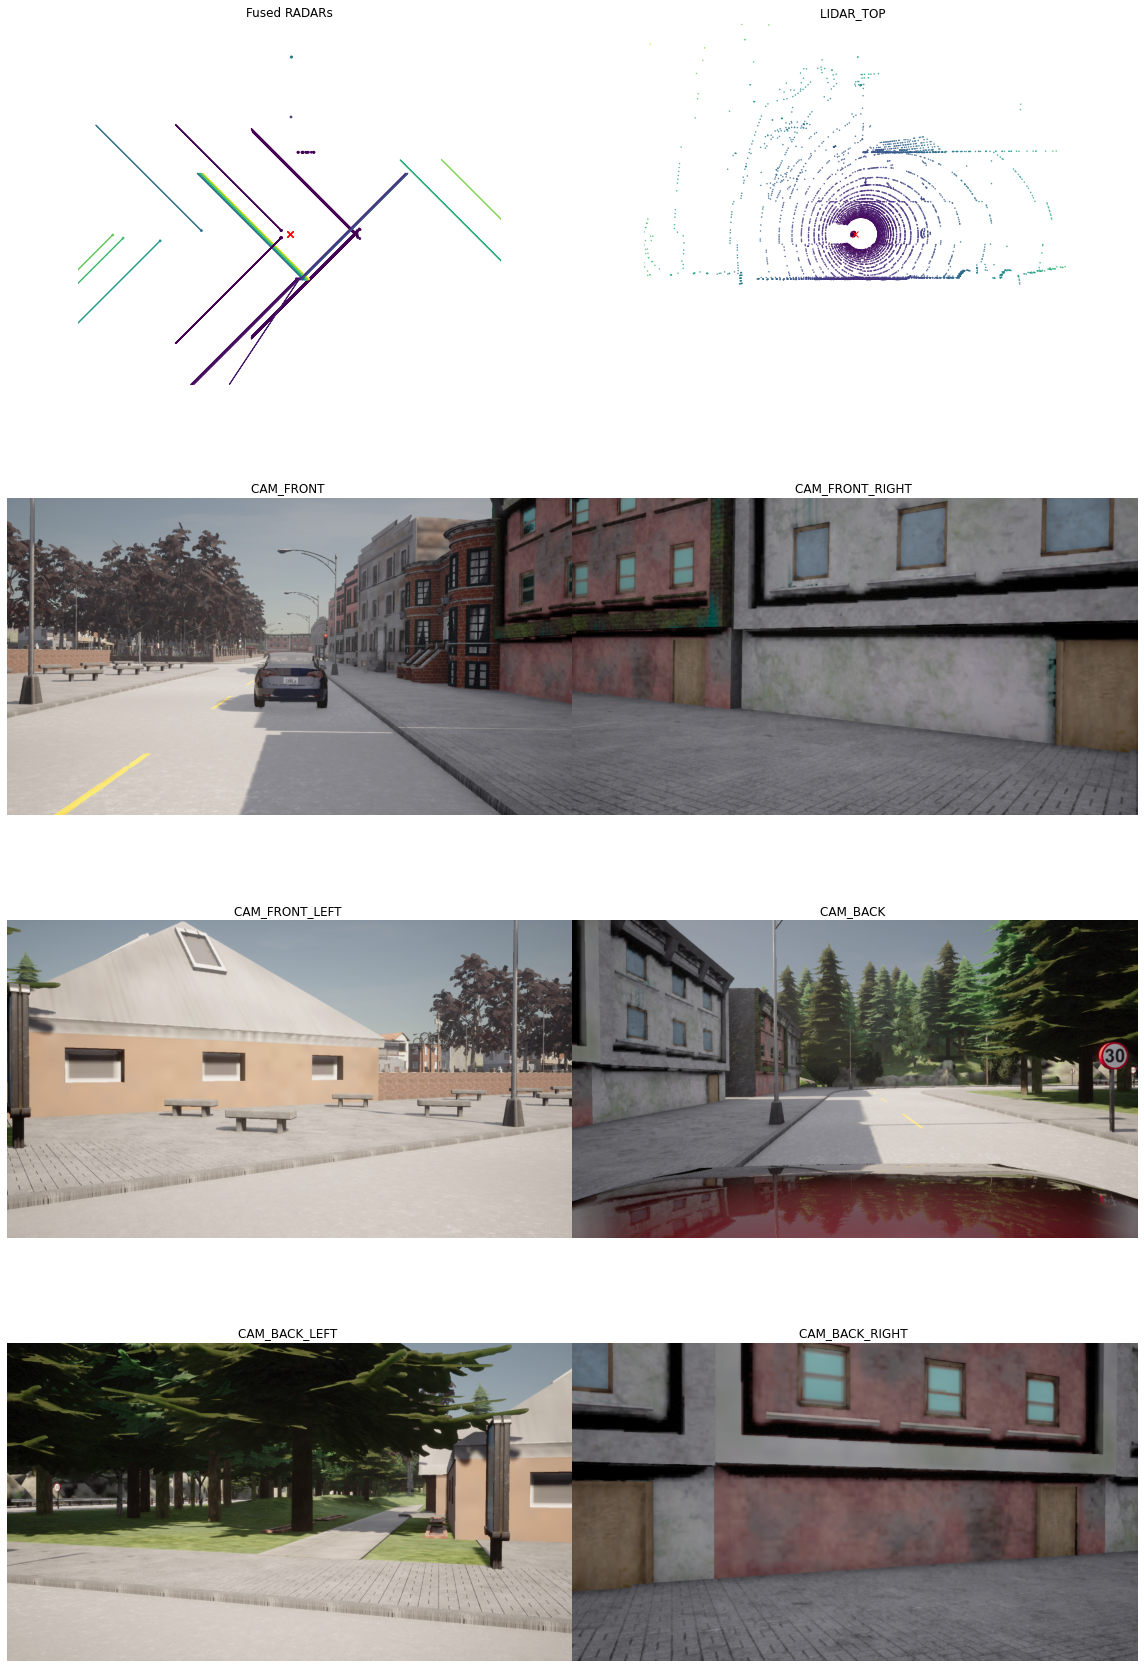

In [61]:
# 最初のシーンを取得
scene = nusc.scene[0]
print(scene)

# 最初の sample_token を取得
first_sample_token = scene['first_sample_token']
print(first_sample_token)
from nuscenes.utils.data_classes import RadarPointCloud
# RadarPointCloud.disable_filters()   # これで ambig_state や dynprop のフィルタを全部OFF

# sample を可視化（画像 or LiDAR にバウンディングボックス付き）
nusc.render_sample(first_sample_token)


In [62]:
my_sample = nusc.get('sample', first_sample_token)
print(my_sample)

{'token': 'e8cecec4-1c6b-43a3-b05a-7c164214f3a6', 'scene_token': 'c473d6eb-2ec8-474d-8cc2-99f9b188b5d5', 'prev': '', 'next': '76235f30-4b83-413d-ab7b-e39ec01067cf', 'timestamp': 6813538, 'data': {'CAM_FRONT': 'f42035eb-9a78-49ce-b5b5-e7e877e54da7', 'CAM_FRONT_RIGHT': 'd2fbd25e-08af-4481-a0e7-1aaf64a59533', 'CAM_FRONT_LEFT': '7a7ac298-6f3d-4e81-9253-dff3ce45d502', 'CAM_BACK': 'a1588477-d3b2-4013-9644-5a9a62247f50', 'CAM_BACK_LEFT': '7d66fc2d-1120-4ca9-9c6d-da63b891593c', 'CAM_BACK_RIGHT': 'c250999a-d0b7-42c9-a223-45f956c56b81', 'RADAR_FRONT': 'aecfeff3-3c05-4c2a-93b8-aebc9500a647', 'RADAR_FRONT_LEFT': '89a960b3-a548-441e-9fe7-85970290590e', 'RADAR_FRONT_RIGHT': '08be56a8-2ee2-422b-a81e-64a1c81bc423', 'RADAR_BACK_LEFT': 'fe6ab439-e042-4f46-b70c-789af04493cc', 'RADAR_BACK_RIGHT': '20e29cad-f784-4a55-a13a-554fc101441d', 'LIDAR_TOP': '5b821d2c-1bdd-4f44-8050-9d7e4c87acae'}, 'anns': []}


In [63]:
# 指定した サンプル（1フレーム） に含まれる 全てのセンサーデータ（sample_data） を一覧表示する
# どのセンサで撮像されたものか、どういったアノテーション情報が含まれているか
nusc.list_sample(my_sample['token'])

Sample: e8cecec4-1c6b-43a3-b05a-7c164214f3a6

sample_data_token: f42035eb-9a78-49ce-b5b5-e7e877e54da7, mod: camera, channel: CAM_FRONT
sample_data_token: d2fbd25e-08af-4481-a0e7-1aaf64a59533, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: 7a7ac298-6f3d-4e81-9253-dff3ce45d502, mod: camera, channel: CAM_FRONT_LEFT
sample_data_token: a1588477-d3b2-4013-9644-5a9a62247f50, mod: camera, channel: CAM_BACK
sample_data_token: 7d66fc2d-1120-4ca9-9c6d-da63b891593c, mod: camera, channel: CAM_BACK_LEFT
sample_data_token: c250999a-d0b7-42c9-a223-45f956c56b81, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: aecfeff3-3c05-4c2a-93b8-aebc9500a647, mod: radar, channel: RADAR_FRONT
sample_data_token: 89a960b3-a548-441e-9fe7-85970290590e, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: 08be56a8-2ee2-422b-a81e-64a1c81bc423, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: fe6ab439-e042-4f46-b70c-789af04493cc, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: 20e29ca

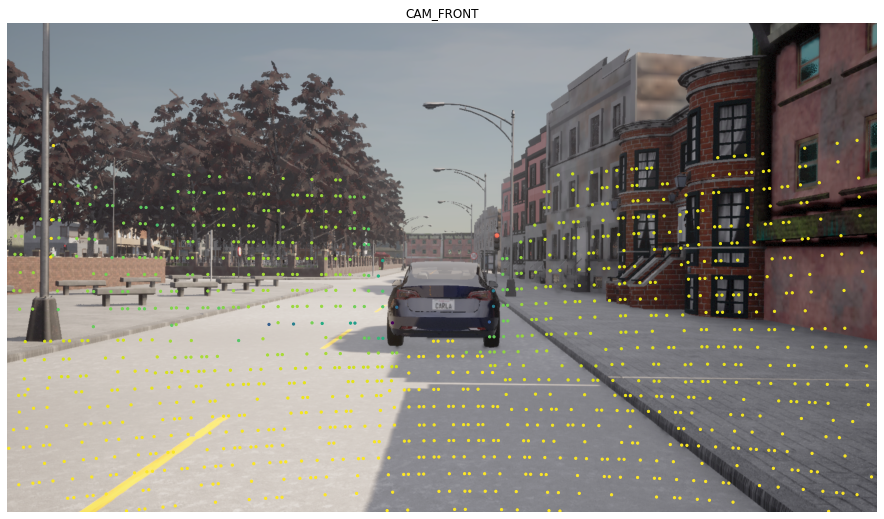

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
nusc.explorer.render_pointcloud_in_image(
    my_sample['token'],
    pointsensor_channel='LIDAR_TOP',
    camera_channel='CAM_FRONT',     # 必要なら別CAMに
    render_intensity=True,
    ax=ax                           # ここで渡す
)
plt.show()
